In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class FeedForwardNN:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.w1 = np.random.randn(2, 2)   # 2 Hidden neuron
        self.b1 = np.random.randn(1, 2)   # Bias for hidden
        self.w2 = np.random.randn(2, 1)   # 1 Output neuron
        self.b2 = np.random.randn(1, 1)   # Bias for output
        self.error_ls = []                # Storing error at every 500 epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        for i in range(self.epochs):
            # Feed Forward
            hidden_input = np.dot(X, self.w1) + self.b1
            hidden_output = self.sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.w2) + self.b2
            final_output = self.sigmoid(final_input)

            # Compute the Error
            error = y - final_output

            # Backpropogation
            der_output = error * self.sigmoid_derivative(final_output)
            der_hidden = np.dot(der_output, self.w2.T) * self.sigmoid_derivative(hidden_output)

            # Update the weights and biases
            self.w2 += np.dot(hidden_output.T, der_output) * self.lr
            self.b2 += np.sum(der_output, axis=0, keepdims=True) * self.lr
            self.w1 += np.dot(X.T, der_hidden) * self.lr
            self.b1 += np.sum(der_hidden, axis=0, keepdims=True) * self.lr

            # Print loss every 500 epochs
            if i % 500 == 0:
                loss = np.mean(np.abs(error))
                self.error_ls.append(loss)
                print(f"Epoch {i}, Loss: {loss}")

    def predict(self, X):
        hidden_input = np.dot(X, self.w1) + self.b1
        hidden_output = self.sigmoid(hidden_input)
    
        final_input = np.dot(hidden_output, self.w2) + self.b2
        final_output = self.sigmoid(final_input)
        return (final_output > 0.5).astype(int).ravel()    # Converted the probability into binary output

In [15]:
inp_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XOR_out = np.array([[0], [1], [1], [0]])

In [16]:
xor_nn = FeedForwardNN(learning_rate=0.5, epochs=10000)

In [17]:
xor_nn.fit(inp_data, XOR_out)

Epoch 0, Loss: 0.4975488330435718
Epoch 500, Loss: 0.33666617804767374
Epoch 1000, Loss: 0.08607473031906418
Epoch 1500, Loss: 0.05753173799691174
Epoch 2000, Loss: 0.04565567982726168
Epoch 2500, Loss: 0.0388369124307868
Epoch 3000, Loss: 0.0343012852073028
Epoch 3500, Loss: 0.031016132763109272
Epoch 4000, Loss: 0.028500413078102943
Epoch 4500, Loss: 0.026496684398976324
Epoch 5000, Loss: 0.024853407542657135
Epoch 5500, Loss: 0.023474945571059877
Epoch 6000, Loss: 0.022297637484565182
Epoch 6500, Loss: 0.02127728304404363
Epoch 7000, Loss: 0.020382126457221844
Epoch 7500, Loss: 0.019588697750233336
Epoch 8000, Loss: 0.01887923260053659
Epoch 8500, Loss: 0.01824000905797484
Epoch 9000, Loss: 0.01766023988571033
Epoch 9500, Loss: 0.017131313976053955


In [18]:
xor_nn.predict([0, 1])

array([1])

In [19]:
[xor_nn.predict(i) for i in inp_data]

[array([0]), array([1]), array([1]), array([0])]

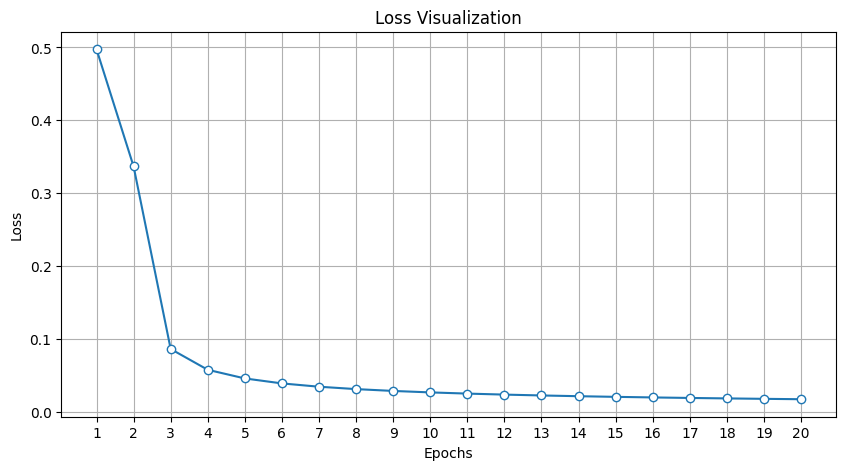

In [29]:
plt.figure(figsize=(10, 5))
plt.title("Loss Visualization")
plt.plot(range(1, 21),xor_nn.error_ls, marker="o", markerfacecolor="#FFFFFF", zorder=3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(zorder=0)
plt.xticks(range(1, 21))
plt.show()